In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
n_features = 10
n_dense_neurons = 3

In [3]:
x = tf.placeholder(tf.float32,(None,n_features))
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [4]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [5]:
init = tf.global_variables_initializer()

In [6]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x : np.random.random([1, n_features])})

In [7]:
print(layer_out)

[[0.45131868 0.23872595 0.6287974 ]]


In [8]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

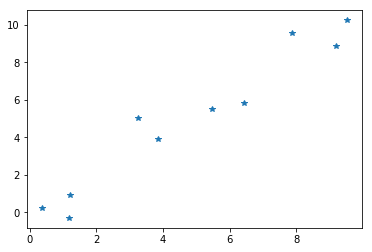

In [9]:
plt.plot(x_data,y_label,'*')

In [10]:
params = np.random.rand(2)
print(params)

[0.05889008 0.00648276]


In [11]:
m, b = [tf.Variable(p) for p in params]

In [12]:
error = 0

for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [14]:
init = tf.global_variables_initializer()

In [15]:
with tf.Session() as sess:
    sess.run(init)    
    for i in range(100):
        sess.run(train)
    final_slope , final_intercept = sess.run([m,b])

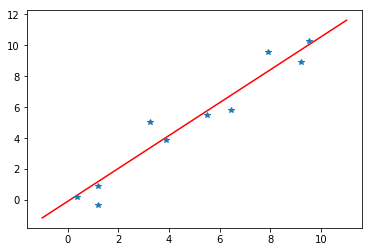

In [16]:
x_test = np.linspace(-1,11,10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')

In [17]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [18]:
noise = np.random.randn(len(x_data))

In [19]:
b = 5
y_true =  (0.5 * x_data ) + 5 + noise

In [20]:
data = pd.concat([pd.DataFrame(data=x_data, columns=['X Data']), pd.DataFrame(data=y_true, columns=['Y'])], axis=1)

In [21]:
data.head()

,X Data,Y
0,0.00000,4.672674
1,0.00001,4.361981
2,0.00002,5.550363
3,0.00003,4.132979
4,0.00004,4.765486


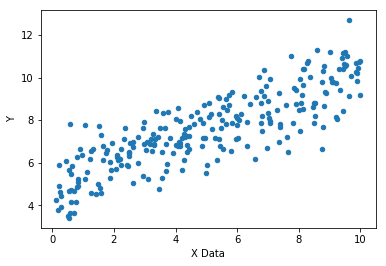

In [22]:
data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [23]:
batch_size = 8
m = tf.Variable(0.5)
b = tf.Variable(0.5)
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [24]:
y_model = m*xph + b

In [25]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [28]:
with tf.Session() as sess:
    
    sess.run(init)
        
    for i in range(1000):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m,b])

In [29]:
y_hat = x_data * model_m + model_b

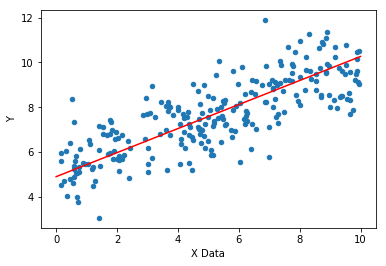

In [30]:
data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state = 101)

In [33]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)
